## Exploratory Data Analysis & Intro
### Goals
1. Investigate top paying roles and skills in data science industry
2. Use python programming language to explore a live dataset into these job posting
3. These insights can help job seekers find the best opportunities.

### Deliverables
1. Create a jupyter Notebooks with each providing insights on core skills in data science

### Questions:
#### Focusing on the UK (size and availabilty in the dataset)
1. Most demand skills for top 3 data roles
2. How in-demand skills are trending for Data Analysts
3. How jobs and skills pay for Data Analyst roles
4. Determine the most Optimal skill to learn for Data Analysis (Based on High Demand and High pay)

In [2]:
# Importing Libraries
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns
from adjustText import adjust_text

# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Hide error message
from IPython.display import display
display()

# Cleaning the Data 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # converting to the right time value
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills) # converting job_skills to a list

In [4]:
# Filter for Data Analyst roles in The UK
df_UK = df[(df['job_country'] == 'United Kingdom') & (df['job_title_short'] == 'Data Analyst')]

df_UK

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
74,Data Analyst,Data Entry/Economic Data Analyst,"Worcester, UK",via BeBee,Full-time,False,United Kingdom,2023-11-01 13:11:18,False,False,United Kingdom,None,NaN,NaN,ttgTalentSolutions,"[sql, r, python, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
97,Data Analyst,"Systems & Data Analyst - Exploitation, Missing...",United Kingdom,via Totaljobs,Full-time and Contractor,False,United Kingdom,2023-12-04 13:14:01,True,False,United Kingdom,None,NaN,NaN,Solihull Metropolitan Borough Council,None,None
170,Data Analyst,Projects & Solutions Data Analyst (UK Pensions),"Birmingham, UK",via LinkedIn,Full-time,False,United Kingdom,2023-01-04 13:35:45,False,False,United Kingdom,None,NaN,NaN,Aon,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
206,Data Analyst,Business Intelligence / Data Analyst,United Kingdom,via SonicJobs,Full-time,False,United Kingdom,2023-02-16 13:17:48,False,False,United Kingdom,None,NaN,NaN,Michael Page Technology,[tableau],{'analyst_tools': ['tableau']}
218,Data Analyst,Data and Strategy Analyst | Customer Success,United Kingdom,via SimplyHired,Full-time,False,United Kingdom,2023-09-01 13:35:06,True,False,United Kingdom,None,NaN,NaN,DeepL SE,[sql],{'programming': ['sql']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784610,Data Analyst,Data Analyst,United Kingdom,via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-21 06:40:29,True,False,United Kingdom,None,NaN,NaN,Totaljobs Group,[excel],{'analyst_tools': ['excel']}
784707,Data Analyst,Forensic Data Analyst,United Kingdom,via Forensic.jobs,Full-time,False,United Kingdom,2023-10-11 06:11:04,True,False,United Kingdom,None,NaN,NaN,Premier Group Recruitment,None,None
784999,Data Analyst,HR Data Analyst,"Manchester, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-23 06:14:46,True,False,United Kingdom,None,NaN,NaN,Sainsbury's,None,None
785061,Data Analyst,Data Analyst,"Manchester, UK",via LinkedIn,Contractor,False,United Kingdom,2023-11-23 06:17:48,True,False,United Kingdom,None,NaN,NaN,Quooker UK,None,None


In [5]:
# Identify top locations...
df_UK['job_location'].value_counts()

job_location
United Kingdom            1989
Anywhere                   959
England, UK                610
Manchester, UK             595
Birmingham, UK             440
                          ... 
Slough, UK (+3 others)       1
Chadderton, UK               1
Quatt, Bridgnorth, UK        1
Partington, UK               1
Holme, Holmfirth, UK         1
Name: count, Length: 698, dtype: int64

In [9]:
df_plot = df_UK['job_location'].value_counts().iloc[1:11].to_frame() #The top 10 except "United Kingdom"
df_plot
# 'Anywhere' signifies Remote 

,count
job_location,
Anywhere,959
"England, UK",610
"Manchester, UK",595
"Birmingham, UK",440
"Leeds, UK",416
"Edinburgh, UK",319
"London, UK",315
"Glasgow, UK",225
"Newcastle upon Tyne, UK",194


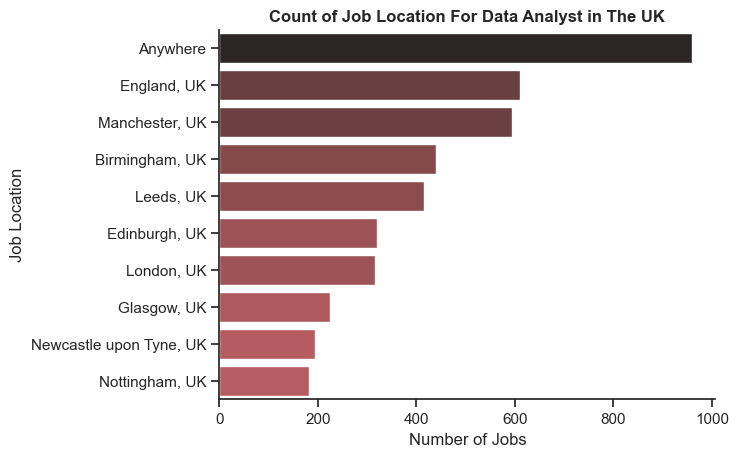

In [10]:
sns.set_theme(style= 'ticks')
sns.barplot(df_plot, x= 'count', y= 'job_location', hue= 'count', palette= 'dark:r_r', legend= False)
plt.title('Count of Job Location For Data Analyst in The UK', weight= 'bold')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Location')
sns.despine()
plt.show()

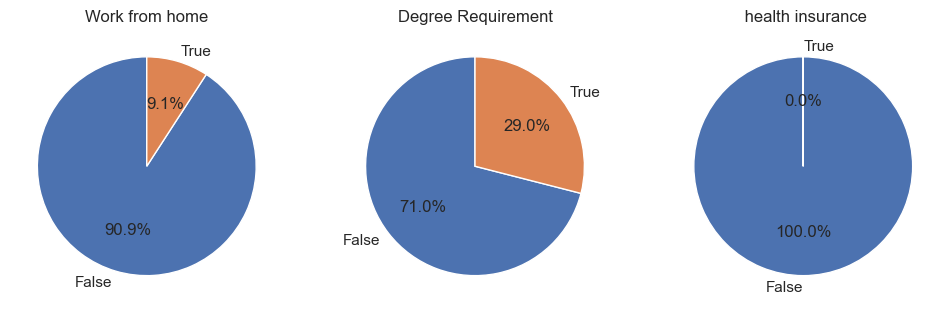

In [11]:
fig, ax = plt.subplots(1,3) # one row three columns
fig.set_size_inches((12,5))

dict_column = {
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention' : 'Degree Requirement',
    'job_health_insurance' : ' health insurance'
} # renaming the titles in a dictionary style so we can loop through it.

for i, (column,title) in enumerate (dict_column.items()):
    ax[i].pie(df_UK[column].value_counts(), startangle= 90, autopct= '%1.1f%%', labels= ['False','True'])
    ax[i].set_title(title)

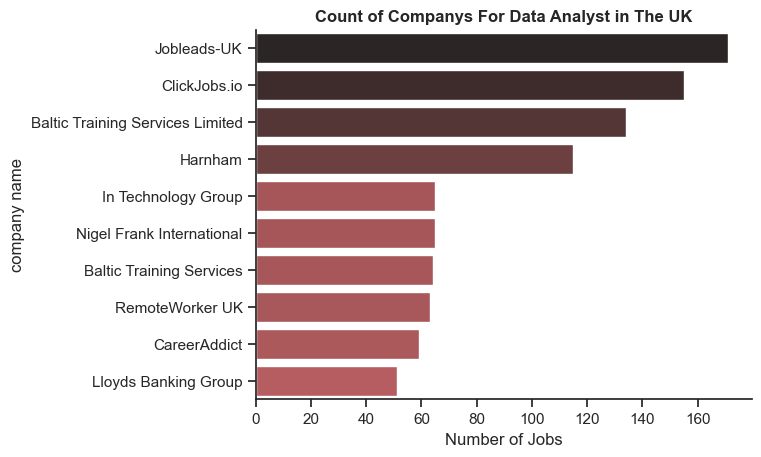

In [ ]:
df_plot = df_UK['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style= 'ticks')
sns.barplot(df_plot, x= 'count', y= 'company_name', hue= 'count', palette= 'dark:r_r', legend= False)
plt.title('Count of Companys For Data Analyst in The UK', weight= 'bold')
plt.xlabel('Number of Jobs')
plt.ylabel('company name')
sns.despine()
plt.show()